# Face Recognition

In [48]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [49]:
subscription_key ='e3c3f74af63b4edc965d8dd70a234c07'
face_api_url = 'https://labuser8face.cognitiveservices.azure.com/face/v1.0/detect'
image_url ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8aw4t-IItjNQo9JqEAs5yvF2OT4cRKoo61aCR_Myqjr_r68l5lGMOePaDWU5JO482u_k&usqp=CAU'

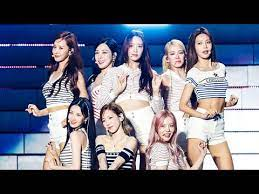

In [50]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [51]:
headers = {'Ocp-Apim-Subsdription-key': subscription_key}
params = {
    'returnFaceID' : 'false',
    'returnFaceLandmarks':'false',
    'returnFaceAttributes': 'Accessories, Smail'
}
data = {'url': image_url}

In [52]:
response = requests.post(face_api_url, params= params, headers=headers, json=data)
faces = response.json()
faces

{'error': {'code': '401',
  'message': 'Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.'}}